# 스타벅스와 메가커피 상권 분석

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import os
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 설정
plt.rc("font", family='NanumGothic')
plt.rc("axes", unicode_minus=False)

In [3]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 함
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 데이터 불러오기

In [4]:
dir_path="data/"
file_list=os.listdir(dir_path)
file_list

['seoul_municipalities_geo_simple.json',
 '소상공인시장진흥공단_상가(상권)정보_강원_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_경기_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_경남_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_경북_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_광주_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_대구_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_대전_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_부산_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_서울_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_세종_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_울산_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_인천_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_전남_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_전북_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_제주_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_충남_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_충북_202012.csv']

In [7]:
# 도시 목록
city_list=[x.split('_')[2] for x in file_list if '.csv' in x]
city_list

['강원',
 '경기',
 '경남',
 '경북',
 '광주',
 '대구',
 '대전',
 '부산',
 '서울',
 '세종',
 '울산',
 '인천',
 '전남',
 '전북',
 '제주',
 '충남',
 '충북']

In [10]:
while True:
    print("도시 목록 : ",end = '')
    for i in city_list:
        if i is not city_list[-1]: print(i, end=',')
        else : print(i)
    city=input('분석하고 싶은 도시 이름을 입력해주세요 : ')
    if city in city_list : break
    print('도시 목록에 있는 것만 입력해주세요!')
    print('---------------------------------------------------\n')

도시 목록 : 강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
분석하고 싶은 도시 이름을 입력해주세요 : 전남


In [11]:
df=pd.DataFrame()
for i in file_list:
    if city in i : df=pd.read_csv(dir_path+i,sep="|")
pd.options.display.max_columns = len(df.columns) # 모든 컬럼이 표시되도록 max_columns의 수를 지정
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,24389396,씨엔엔아카데미수학전문학원,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,46,전라남도,46110,목포시,4611079000,옥암동,4.611016e+09,옥암동,4611016400209790007,1,대지,979,7.0,전라남도 목포시 옥암동 979-7,461103281038,전라남도 목포시 삼향천로,90,1.0,4611016400109790007020548,NaN,전라남도 목포시 삼향천로 90-1,530831,58684.0,NaN,NaN,NaN,126.431483,34.808126
1,20169459,연강떡방앗간,NaN,Q,음식,Q08,제과제빵떡케익,Q08A03,떡전문,I56191,제과점업,46,전라남도,46770,고흥군,4677042000,두원면,4.677042e+09,두원면,4677042026203150002,1,대지,315,2.0,전라남도 고흥군 두원면 대전리 315-2,467703289013,전라남도 고흥군 두원면 두원로,1173,NaN,4677042026103140003043752,NaN,전라남도 고흥군 두원면 두원로 1173,548872,59513.0,NaN,NaN,NaN,127.268305,34.701214
2,27660898,홍강헤어,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,두발미용업,46,전라남도,46130,여수시,4613079000,시전동,4.613013e+09,신기동,4613013300200380001,1,대지,38,1.0,전라남도 여수시 신기동 38-1,461304646611,전라남도 여수시 신기북7길,17,NaN,4613013300100380001076608,NaN,전라남도 여수시 신기북7길 17,555802,59683.0,NaN,1.0,NaN,127.675579,34.762812
3,20546070,미송가든,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,46,전라남도,46820,해남군,4682041000,산이면,4.682041e+09,산이면,4682041021202010002,1,대지,201,2.0,전라남도 해남군 산이면 노송리 201-2,468203294010,전라남도 해남군 산이면 산이로,529,NaN,4682041021102010002207256,미송가든,전라남도 해남군 산이면 산이로 529,536852,59012.0,NaN,1.0,NaN,126.510039,34.618782
4,20748503,이경주헤어숍,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,두발미용업,46,전라남도,46150,순천시,4615055000,삼산동,4.615011e+09,석현동,4615010800202160003,1,대지,216,3.0,전라남도 순천시 석현동 216-3,461503283038,전라남도 순천시 중앙로,290,NaN,4615010800102160003060386,오리정이용원,전라남도 순천시 중앙로 290,540949,57937.0,NaN,NaN,NaN,127.483393,34.971497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117060,17216505,여수딸기모찌,NaN,Q,음식,Q08,제과제빵떡케익,Q08A03,떡전문,I56191,제과점업,46,전라남도,46130,여수시,4613057000,중앙동,4.613011e+09,중앙동,4613010700207820000,1,대지,782,NaN,전라남도 여수시 중앙동 782,461303282072,전라남도 여수시 중앙로,70,NaN,4613010700107820000064949,NaN,전라남도 여수시 중앙로 70,550060,59735.0,NaN,1.0,NaN,127.735198,34.739868
117061,17212148,리앤케이,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,두발미용업,46,전라남도,46110,목포시,4611070500,북항동,4.611010e+09,산정동,4611010200211110022,1,대지,1111,22.0,전라남도 목포시 산정동 1111-22,461104643837,전라남도 목포시 청호로219번길,30,NaN,4611010200111110022000001,NaN,전라남도 목포시 청호로219번길 30,530809,58624.0,NaN,1.0,NaN,126.367555,34.807411
117062,17221214,구복수산,NaN,D,소매,D01,음/식료품소매,D01A12,수산물소매,G47213,수산물 소매업,46,전라남도,46110,목포시,4611053500,연동,4.611010e+09,산정동,4611010200210960001,1,대지,1096,1.0,전라남도 목포시 산정동 1096-1,461104643315,전라남도 목포시 산정로63번길,11,NaN,4611010200110960001053821,NaN,전라남도 목포시 산정로63번길 11,530811,58731.0,NaN,1.0,NaN,126.391702,34.794131
117063,17219504,블랑슈즈,NaN,D,소매,D06,가방/신발/액세서리,D06A01,신발소매,G47420,신발 소매업,46,전라남도,46150,순천시,4615062000,중앙동,4.615012e+09,중앙동,4615012100200610041,1,대지,61,41.0,전라남도 순천시 중앙동 61-41,461504649999,전라남도 순천시 중앙6길,7,NaN,4615012100100610041077905,태양미용실,전라남도 순천시 중앙6길 7,540210,57942.0,NaN,1.0,NaN,127.484532,34.955736


## 인덱스 정보 보기

In [12]:
df.index

RangeIndex(start=0, stop=117065, step=1)

## 컬럼명 보기

In [13]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

## 결측치 확인하기

In [14]:
import missingno as msno
True==1

True

### 데이터 프레임 결측치 시각화

<AxesSubplot:>

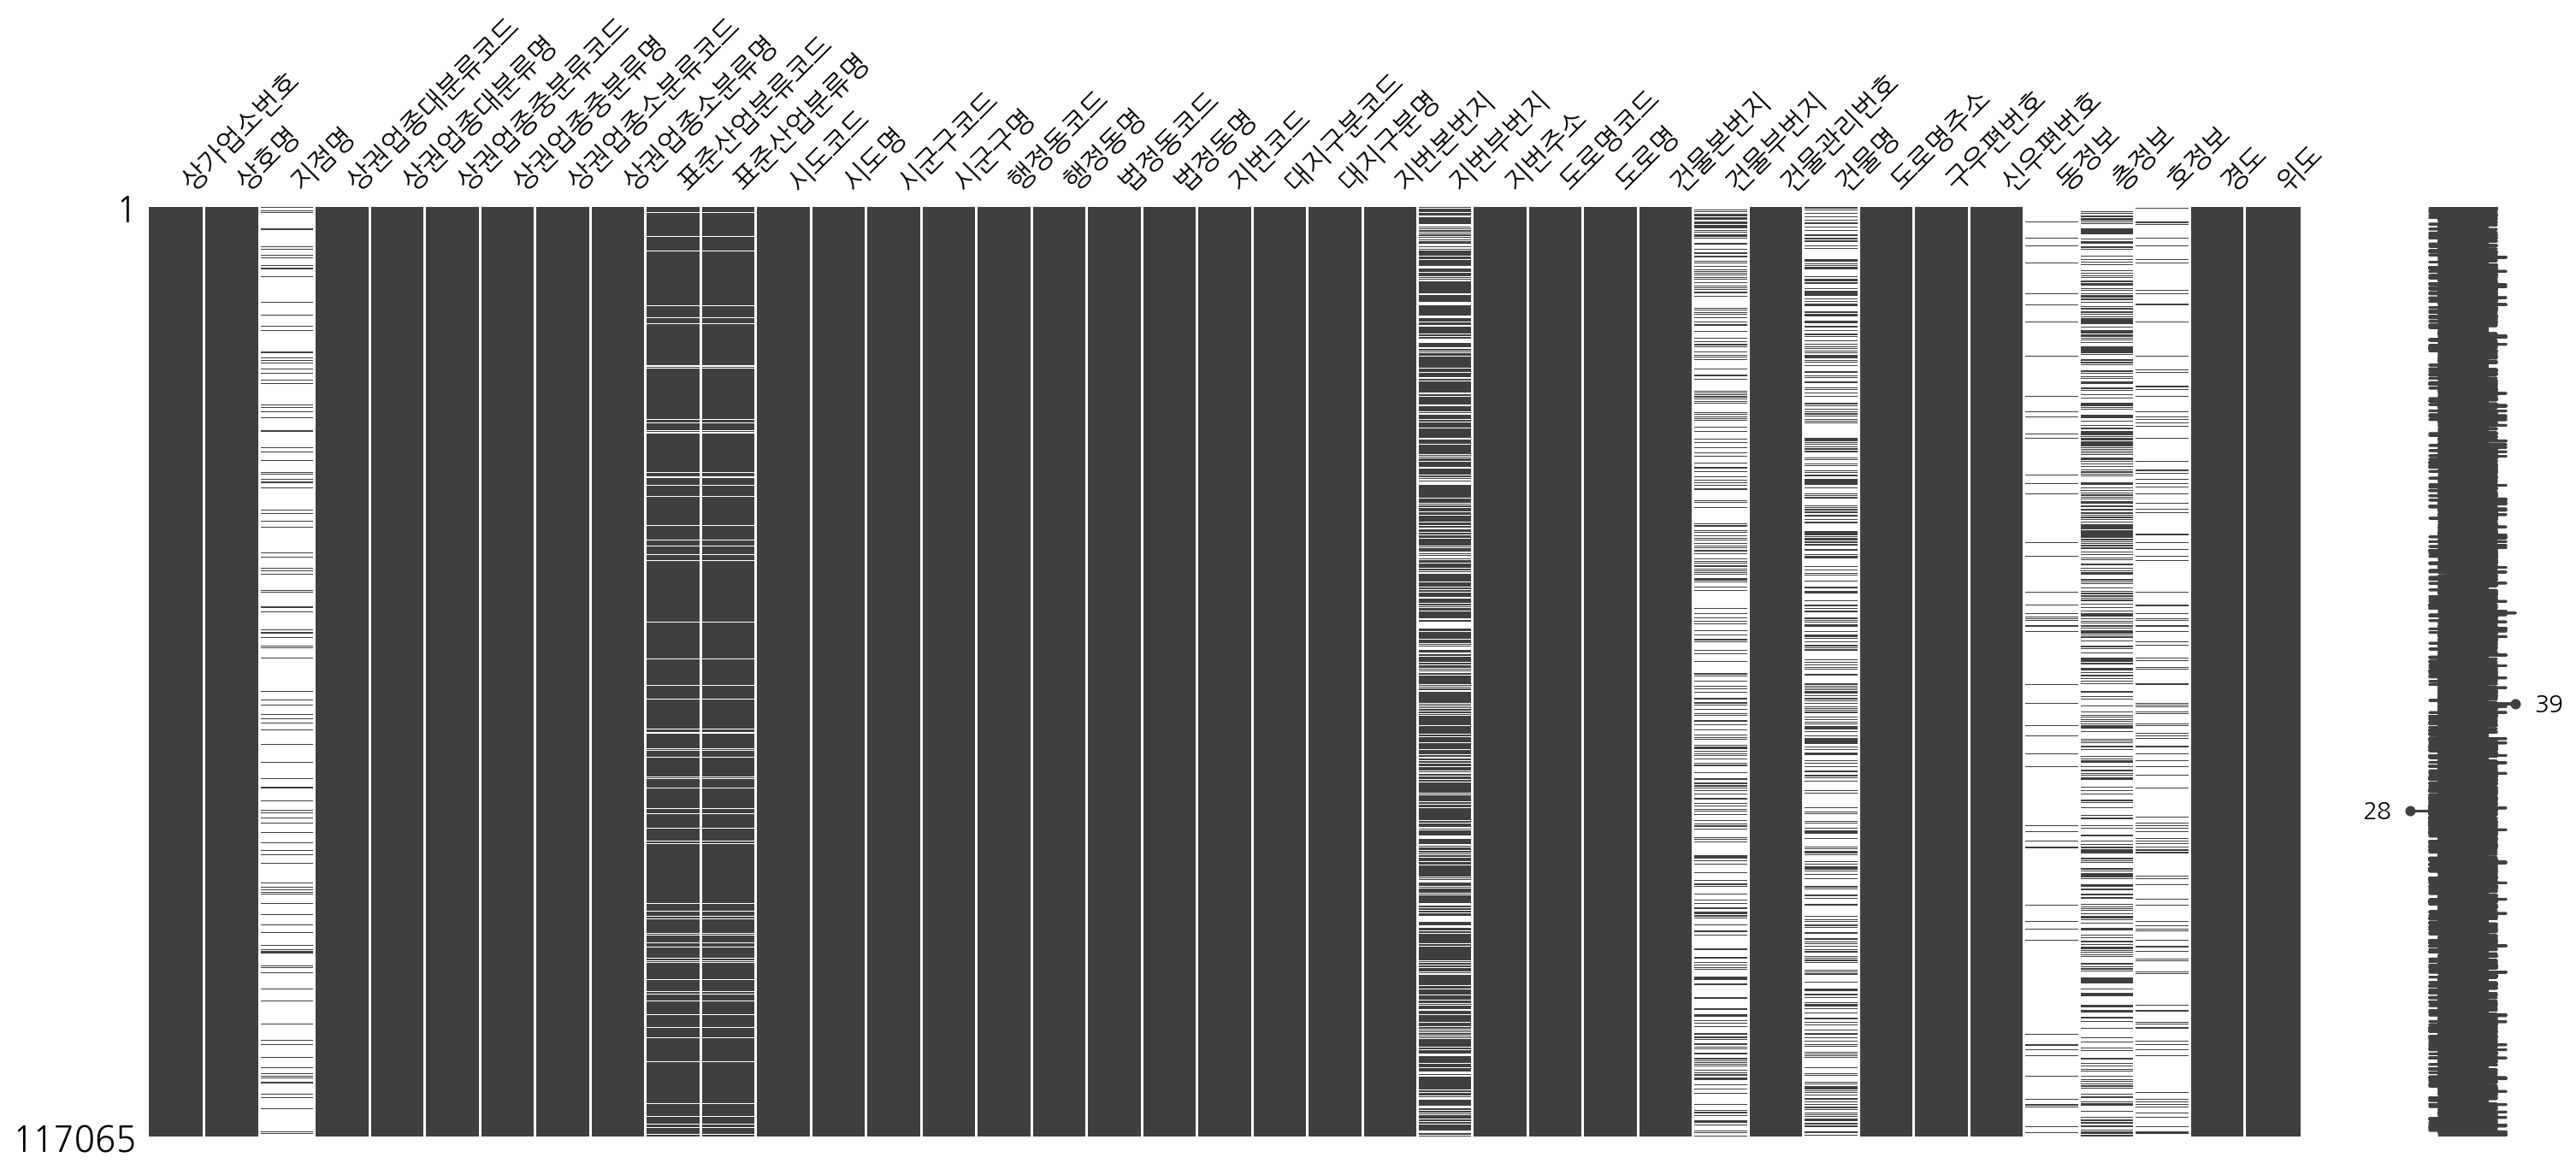

In [15]:
msno.matrix(df)

+ 하얀 부분이 결측치

<AxesSubplot:>

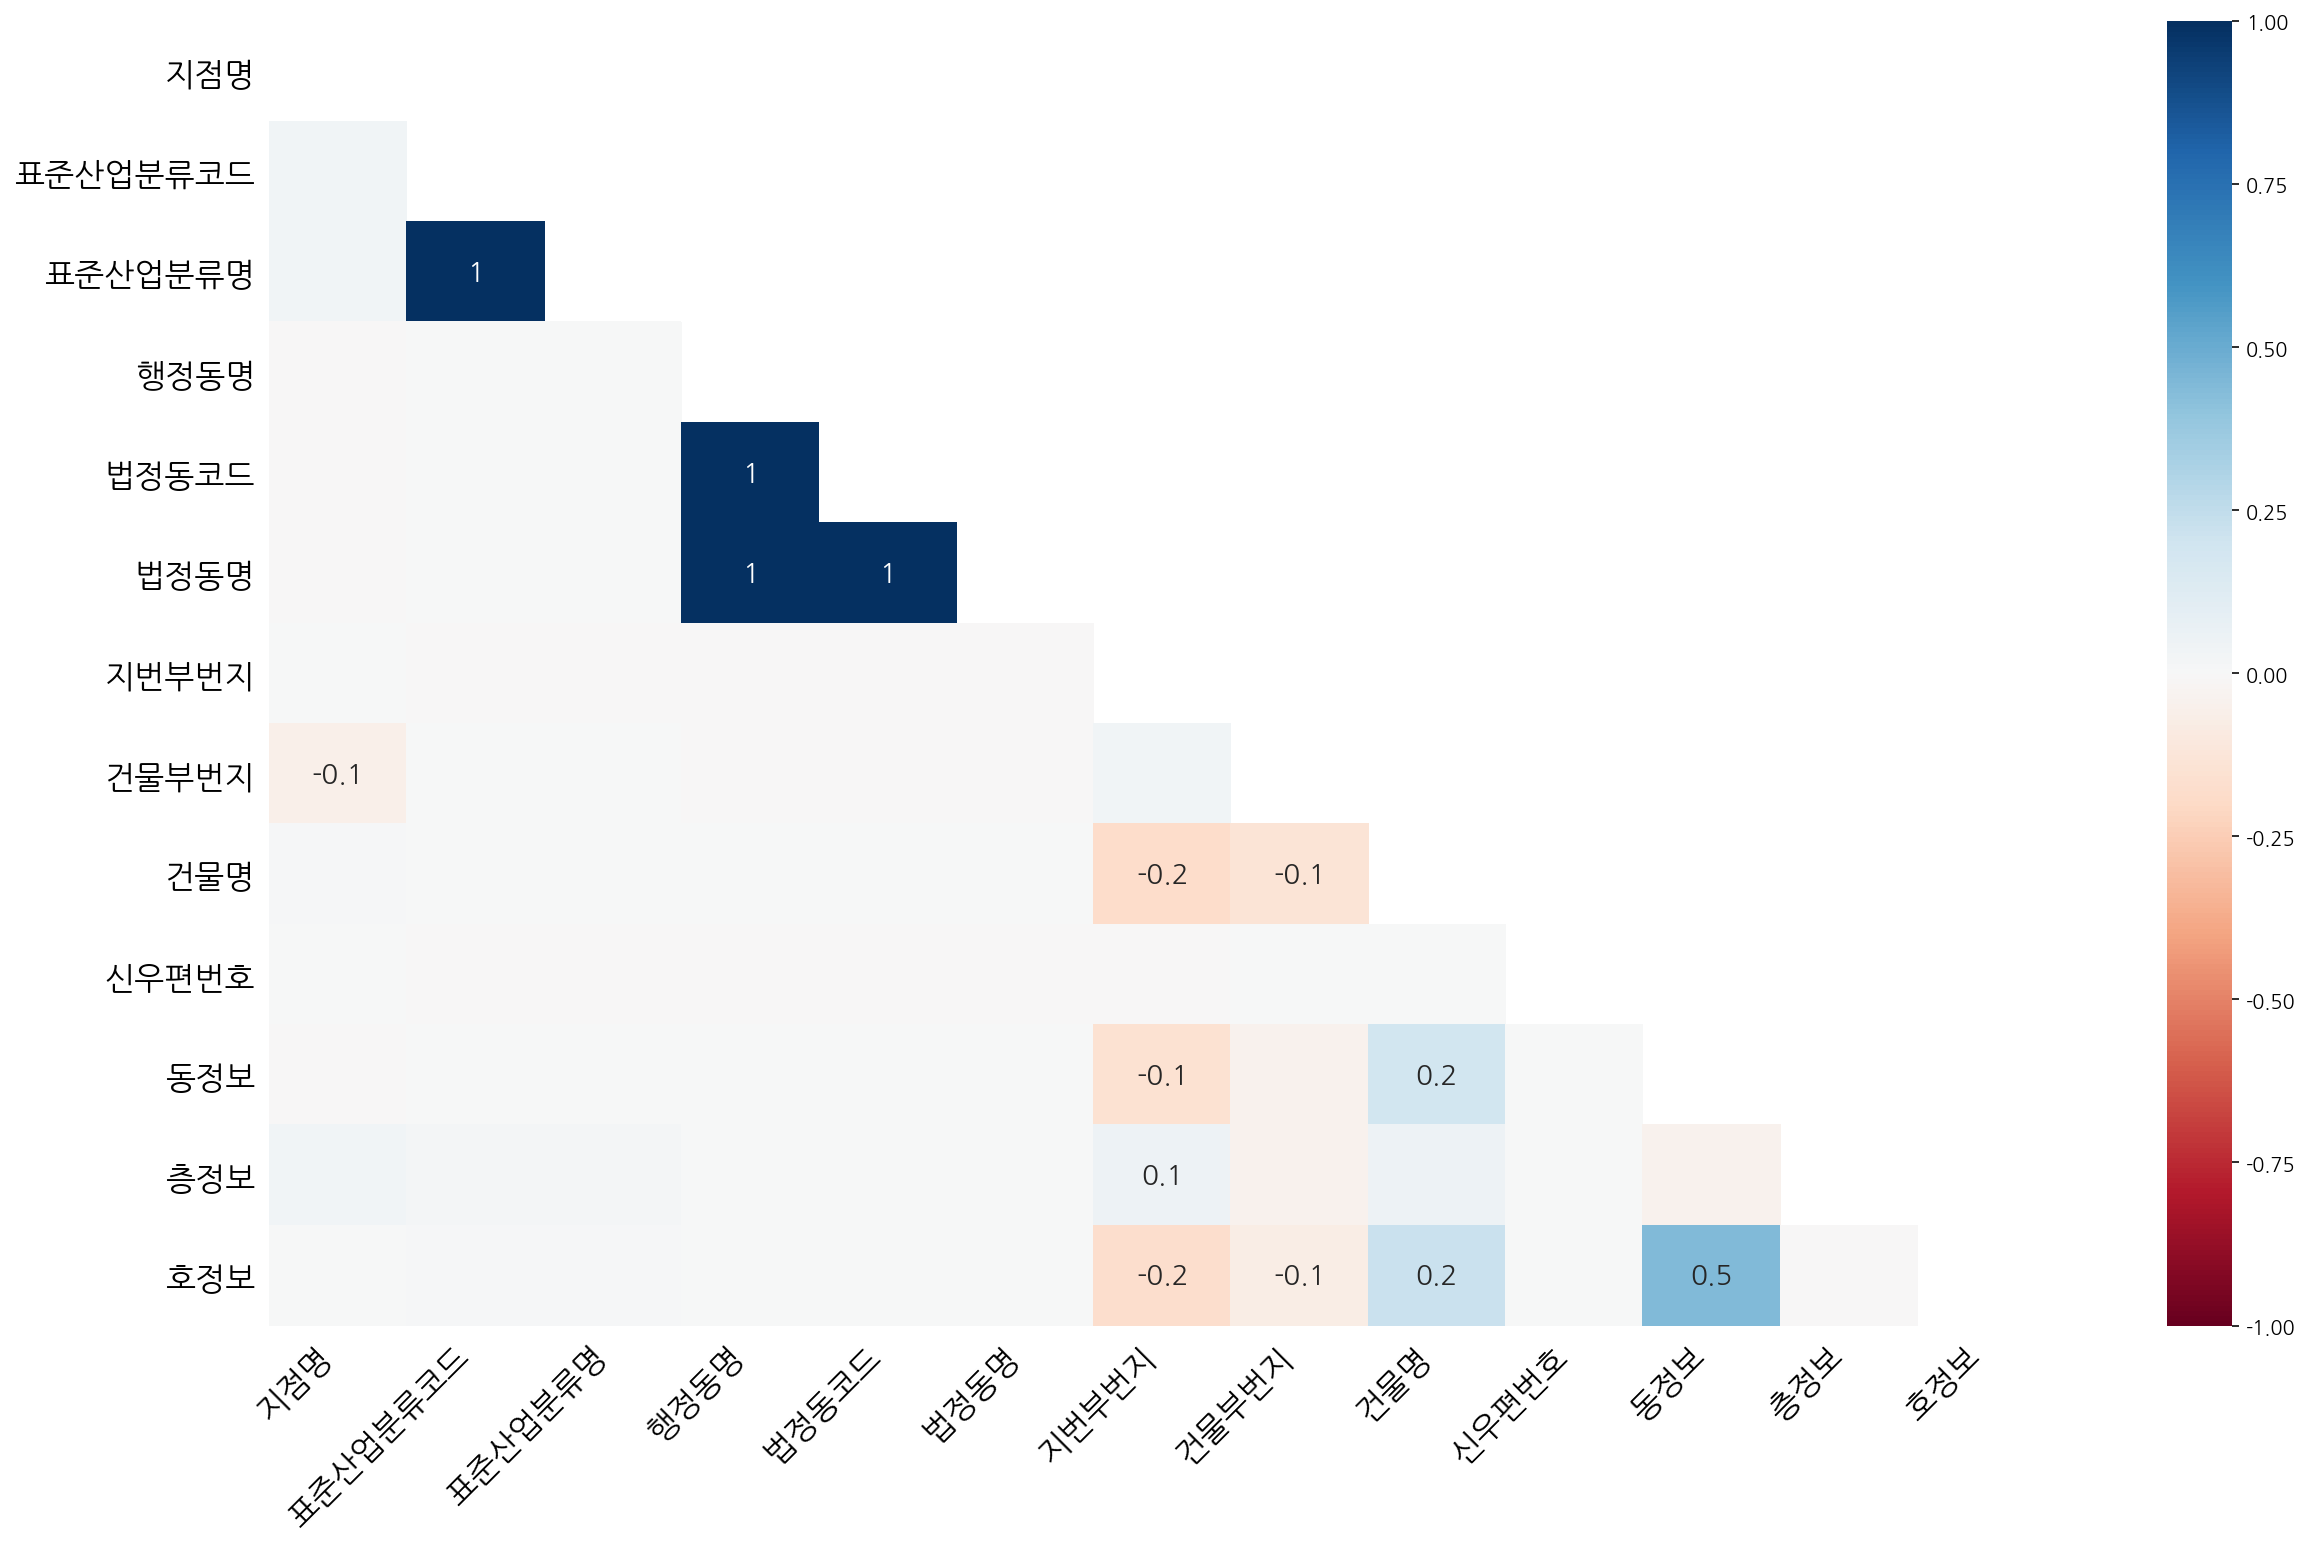

In [16]:
msno.heatmap(df)

<AxesSubplot:title={'center':'<열의 결측치>'}>

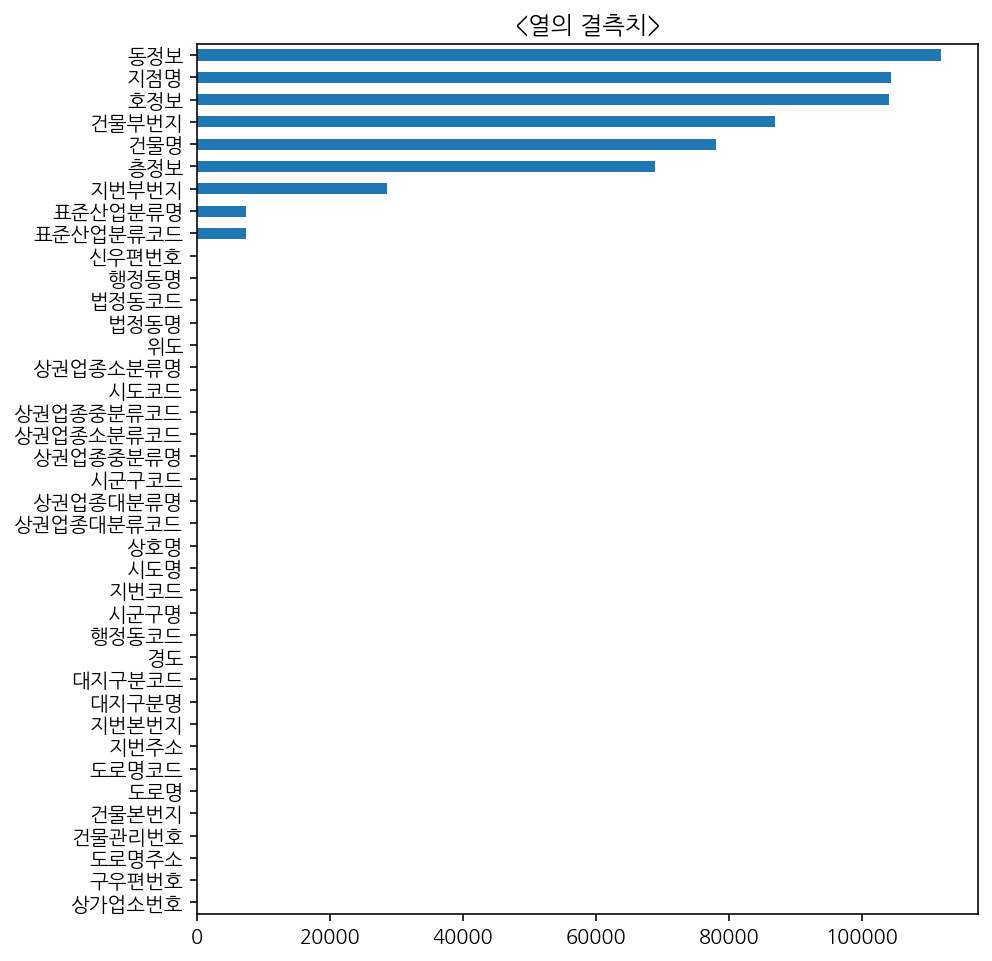

In [17]:
n=df.isnull().sum()
plt.title('<열의 결측치>')
n.sort_values().plot.barh(figsize=(7, 8))

### 결측치가 많은 컬럼이나 사용하지 않는 컬럼 제거

#### 결측치가 너무 많은 컬럼 제거

In [18]:
# sort_values 를 통해 결측치가 많은 데이터를 위에서 9개 가져와서 not_use 변수로 저장
# not_use 변수에 담긴 인덱스값만 추출해서 not_use_col 변수로 저장
not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['동정보', '지점명', '호정보', '건물부번지', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [19]:
# 사용하지 않는 컬럼을 제거
df = df.drop(not_use_col, axis=1)

#### 사용하지 않는 컬럼 제거

In [20]:
# 컬럼명을 전처리 하기 위해 cols 라는 변수에 저장
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [21]:
# 컬럼명에 "코드", "번호"가 있지만 분석에 필요하지 않기 때문에 
# '코드'와 '번호'를 포함하고 있는 컬럼 찾아와서 cols_code 라는 변수에 저장
cols_code = cols[cols.str.contains("코드|번호")]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [22]:
# "코드", "번호" 가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거
df = df.drop(cols_code, axis=1)

In [23]:
city="".join(list(df['시도명'].unique()))

In [24]:
# "상호명"의 문자열을 소문자로 변경한 "상호명_소문자" 컬럼 생성
df["상호명_소문자"] = df["상호명"].str.lower()

In [25]:
df

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도,상호명_소문자
0,씨엔엔아카데미수학전문학원,학문/교육,학원-보습교습입시,학원-입시,전라남도,목포시,옥암동,옥암동,대지,979,전라남도 목포시 옥암동 979-7,전라남도 목포시 삼향천로,90,전라남도 목포시 삼향천로 90-1,126.431483,34.808126,씨엔엔아카데미수학전문학원
1,연강떡방앗간,음식,제과제빵떡케익,떡전문,전라남도,고흥군,두원면,두원면,대지,315,전라남도 고흥군 두원면 대전리 315-2,전라남도 고흥군 두원면 두원로,1173,전라남도 고흥군 두원면 두원로 1173,127.268305,34.701214,연강떡방앗간
2,홍강헤어,생활서비스,이/미용/건강,여성미용실,전라남도,여수시,시전동,신기동,대지,38,전라남도 여수시 신기동 38-1,전라남도 여수시 신기북7길,17,전라남도 여수시 신기북7길 17,127.675579,34.762812,홍강헤어
3,미송가든,음식,한식,한식/백반/한정식,전라남도,해남군,산이면,산이면,대지,201,전라남도 해남군 산이면 노송리 201-2,전라남도 해남군 산이면 산이로,529,전라남도 해남군 산이면 산이로 529,126.510039,34.618782,미송가든
4,이경주헤어숍,생활서비스,이/미용/건강,여성미용실,전라남도,순천시,삼산동,석현동,대지,216,전라남도 순천시 석현동 216-3,전라남도 순천시 중앙로,290,전라남도 순천시 중앙로 290,127.483393,34.971497,이경주헤어숍
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117060,여수딸기모찌,음식,제과제빵떡케익,떡전문,전라남도,여수시,중앙동,중앙동,대지,782,전라남도 여수시 중앙동 782,전라남도 여수시 중앙로,70,전라남도 여수시 중앙로 70,127.735198,34.739868,여수딸기모찌
117061,리앤케이,생활서비스,이/미용/건강,여성미용실,전라남도,목포시,북항동,산정동,대지,1111,전라남도 목포시 산정동 1111-22,전라남도 목포시 청호로219번길,30,전라남도 목포시 청호로219번길 30,126.367555,34.807411,리앤케이
117062,구복수산,소매,음/식료품소매,수산물소매,전라남도,목포시,연동,산정동,대지,1096,전라남도 목포시 산정동 1096-1,전라남도 목포시 산정로63번길,11,전라남도 목포시 산정로63번길 11,126.391702,34.794131,구복수산
117063,블랑슈즈,소매,가방/신발/액세서리,신발소매,전라남도,순천시,중앙동,중앙동,대지,61,전라남도 순천시 중앙동 61-41,전라남도 순천시 중앙6길,7,전라남도 순천시 중앙6길 7,127.484532,34.955736,블랑슈즈


In [26]:
# 스타벅스와 메가커피 포함한 데이터 df_cafe에 저장
df_cafe = df[(df["상권업종중분류명"]=='커피점/카페') & (df["상호명_소문자"].str.contains('스타벅스|starbucks|메가커피|mega|메가엠지씨',na=False))]

In [27]:
df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "스타벅스"
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "메가커피"
df_cafe = df_cafe.drop(['상호명','상호명_소문자','상권업종대분류명', '상권업종중분류명', '상권업종소분류명'], axis=1)
df_cafe

,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도,브랜드명
13307,전라남도,순천시,왕조1동,왕지동,대지,876,전라남도 순천시 왕지동 876-10,전라남도 순천시 왕지2길,17,전라남도 순천시 왕지2길 17,127.523253,34.968163,스타벅스
13504,전라남도,여수시,쌍봉동,학동,대지,84,전라남도 여수시 학동 84-5,전라남도 여수시 망마로,39,전라남도 여수시 망마로 39,127.667125,34.759832,스타벅스
13684,전라남도,여수시,여서동,여서동,대지,213,전라남도 여수시 여서동 213-6,전라남도 여수시 여문1로,49,전라남도 여수시 여문1로 49,127.704213,34.752869,스타벅스
15609,전라남도,여수시,둔덕동,둔덕동,대지,491,전라남도 여수시 둔덕동 491-1,전라남도 여수시 좌수영로,482,전라남도 여수시 좌수영로 482,127.697525,34.768764,스타벅스
18668,전라남도,화순군,화순읍,화순읍,대지,242,전라남도 화순군 화순읍 만연리 242-3,전라남도 화순군 화순읍 광덕로,187,전라남도 화순군 화순읍 광덕로 187,126.992255,35.061523,메가커피
21229,전라남도,나주시,성북동,대호동,대지,1031,전라남도 나주시 대호동 1031-2,전라남도 나주시 대호길,83,전라남도 나주시 대호길 83,126.717329,35.042666,메가커피
21956,전라남도,목포시,북항동,산정동,대지,1670,전라남도 목포시 산정동 1670-1,전라남도 목포시 청호로,177,전라남도 목포시 청호로 177,126.373008,34.806312,메가커피
22205,전라남도,나주시,빛가람동,빛가람동,대지,643,전라남도 나주시 빛가람동 643-3,전라남도 나주시 그린로,196,전라남도 나주시 그린로 196,126.787793,35.009183,메가커피
22312,전라남도,여수시,쌍봉동,학동,대지,67,전라남도 여수시 학동 67-6,전라남도 여수시 도원로,271,전라남도 여수시 도원로 271,127.660968,34.761456,스타벅스
23685,전라남도,목포시,신흥동,상동,대지,1124,전라남도 목포시 상동 1124-2,전라남도 목포시 원형로,48,전라남도 목포시 원형로 48,126.431271,34.799145,메가커피


# 분석

## 브랜드명으로 각 카페의 수

In [28]:
df_cafe["브랜드명"].value_counts()

스타벅스    23
메가커피    22
Name: 브랜드명, dtype: int64

## 브랜드명으로 막대그래프

Text(0.5, 1.0, '<전라남도의 스타벅스와 메가커피의 점포수>')

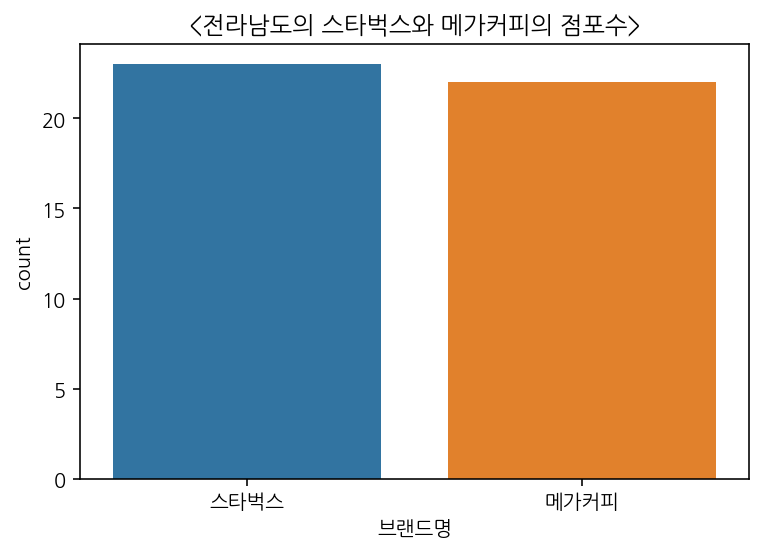

In [29]:
sns.countplot(data=df_cafe, x="브랜드명")
plt.title('<{}의 스타벅스와 메가커피의 점포수>'.format(city))

## 시군구별 점포수

Text(0.5, 1.0, '<전라남도의 구별 스타벅스와 메가커피의 점포수>')

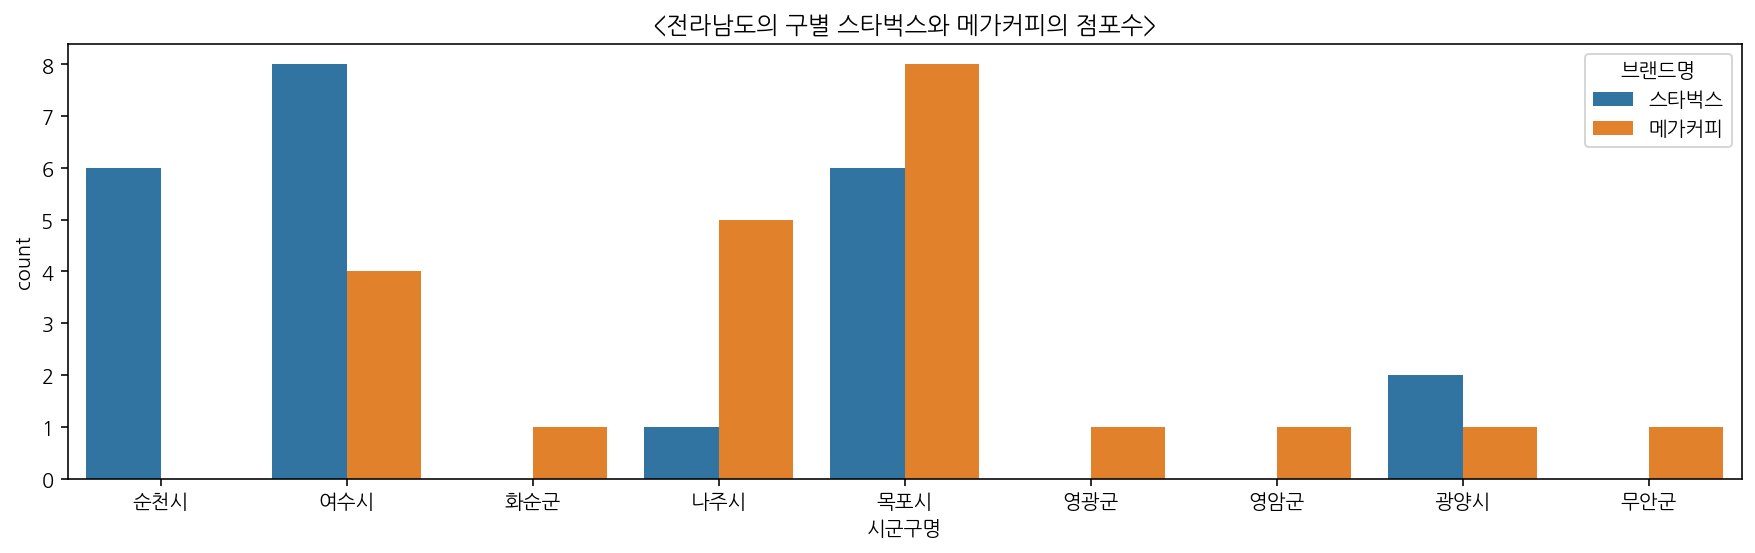

In [30]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")
plt.title('<{}의 구별 스타벅스와 메가커피의 점포수>'.format(city))

## 위도, 경도로 scatterplot 그리기

Text(0.5, 1.0, '<전라남도의 구별 스타벅스와 메가커피의 점포수>')

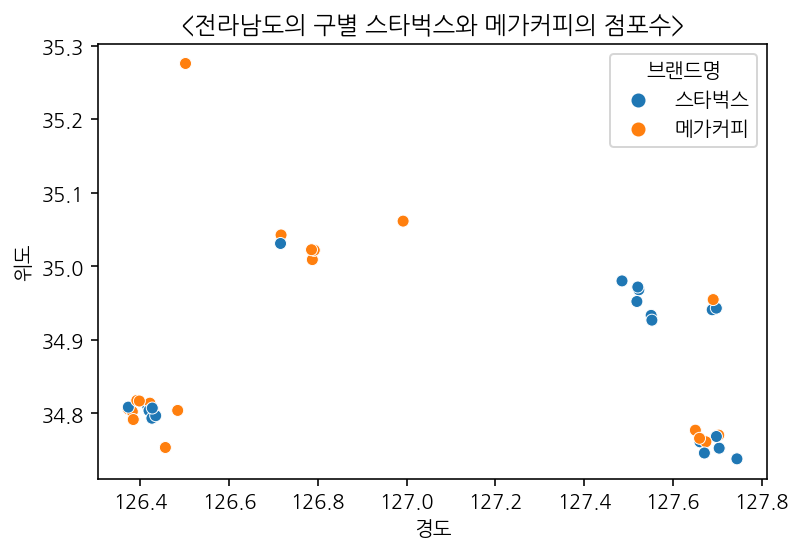

In [31]:
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")
plt.title('<{}의 구별 스타벅스와 메가커피의 점포수>'.format(city))

Text(0.5, 1.0, '<전라남도의 구별 스타벅스>')

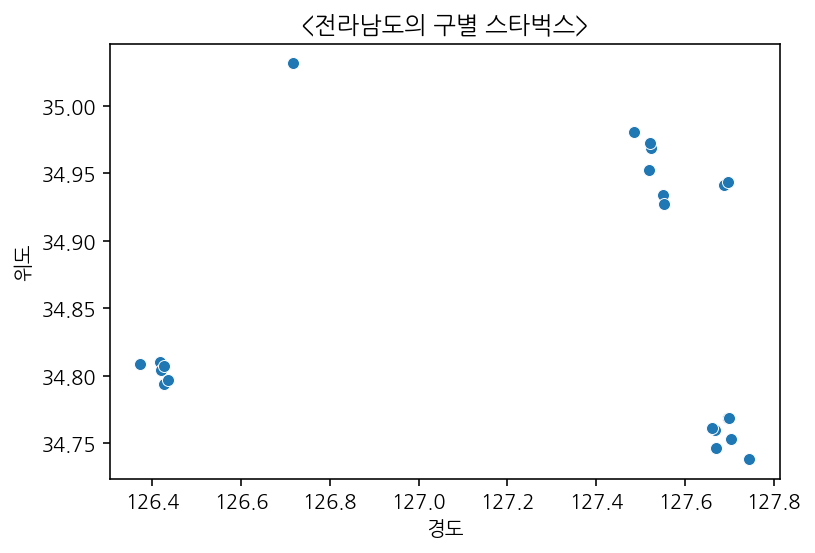

In [32]:
sns.scatterplot(data=df_cafe[df_cafe['브랜드명']=='스타벅스'], x="경도", y="위도")
plt.title('<{}의 구별 스타벅스>'.format(city))

Text(0.5, 1.0, '<전라남도의 구별 메가커피>')

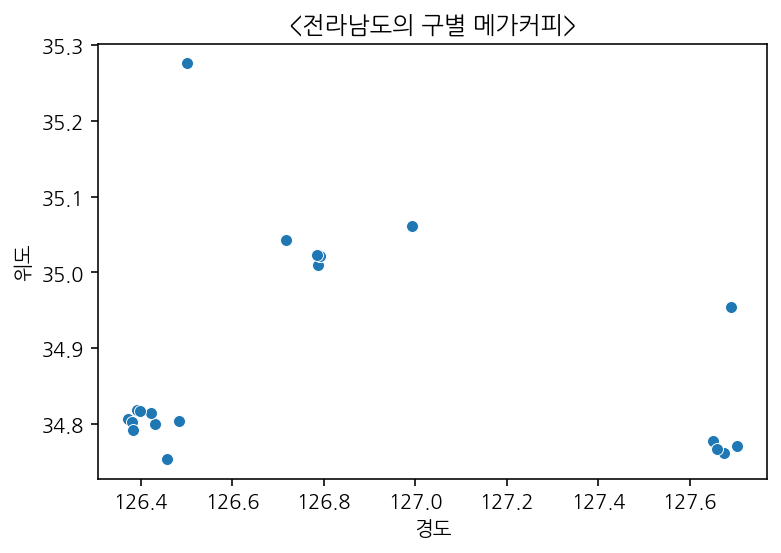

In [33]:
sns.scatterplot(data=df_cafe[df_cafe['브랜드명']=='메가커피'], x="경도", y="위도")
plt.title('<{}의 구별 메가커피>'.format(city))

## 브랜드별 구별 점포 수

In [34]:
# groupby 를 사용해 구별로 그룹화
# 그룹화한 결과를 df_cafe_vs 변수에 담아서 재사용합니다.
df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["경도"].count()
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.columns = ['구', '브랜드명', '매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,광양시,메가커피,1
1,광양시,스타벅스,2
2,나주시,메가커피,5
3,나주시,스타벅스,1
4,목포시,메가커피,8


Text(0.5, 1.0, '<전라남도의 시군구별 스타벅스와 메가커피 점포수>')

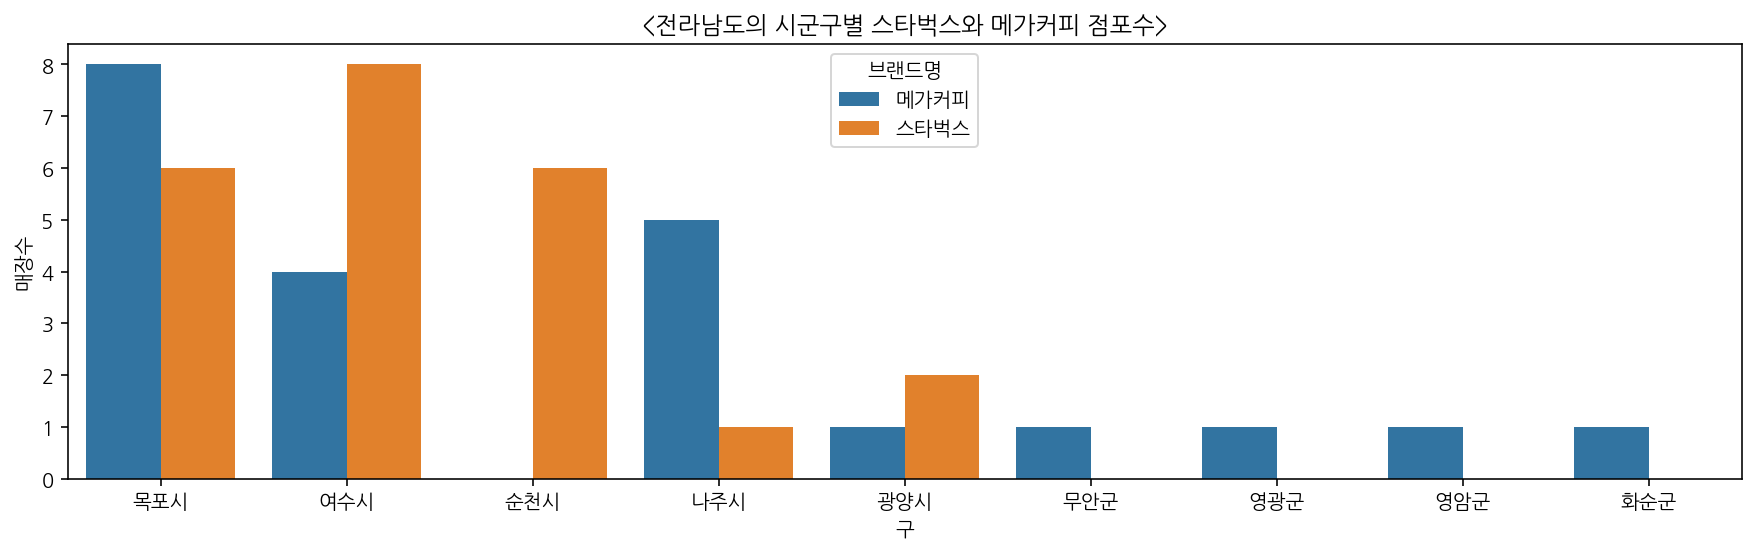

In [35]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs.sort_values("매장수", ascending=False), x="구", y="매장수", hue="브랜드명")
plt.title('<{}의 시군구별 스타벅스와 메가커피 점포수>'.format(city))

Text(0.5, 1.0, '<전라남도의 시군구별 스타벅스 점포수>')

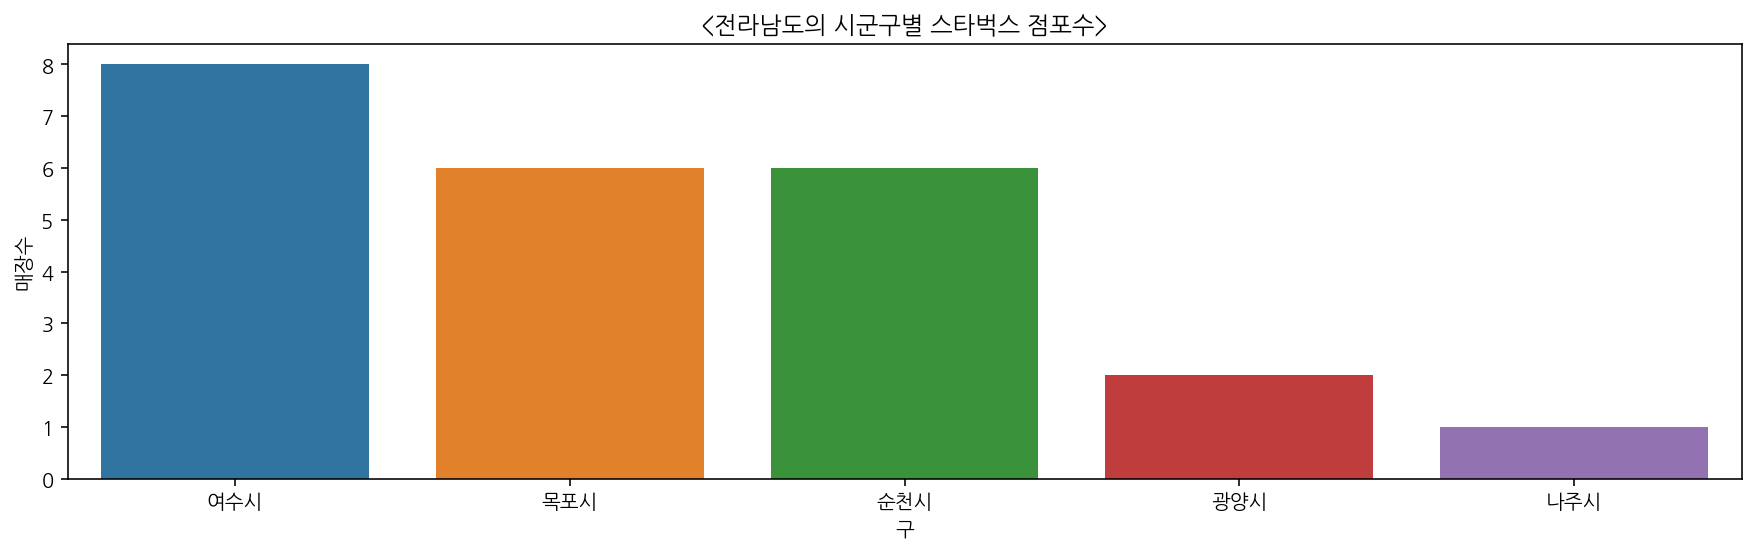

In [36]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs[df_cafe_vs['브랜드명']=='스타벅스'].sort_values("매장수", ascending=False), x="구", y="매장수")#, hue="브랜드명")
plt.title('<{}의 시군구별 스타벅스 점포수>'.format(city))

Text(0.5, 1.0, '<전라남도의 시군구별 메가커피 점포수>')

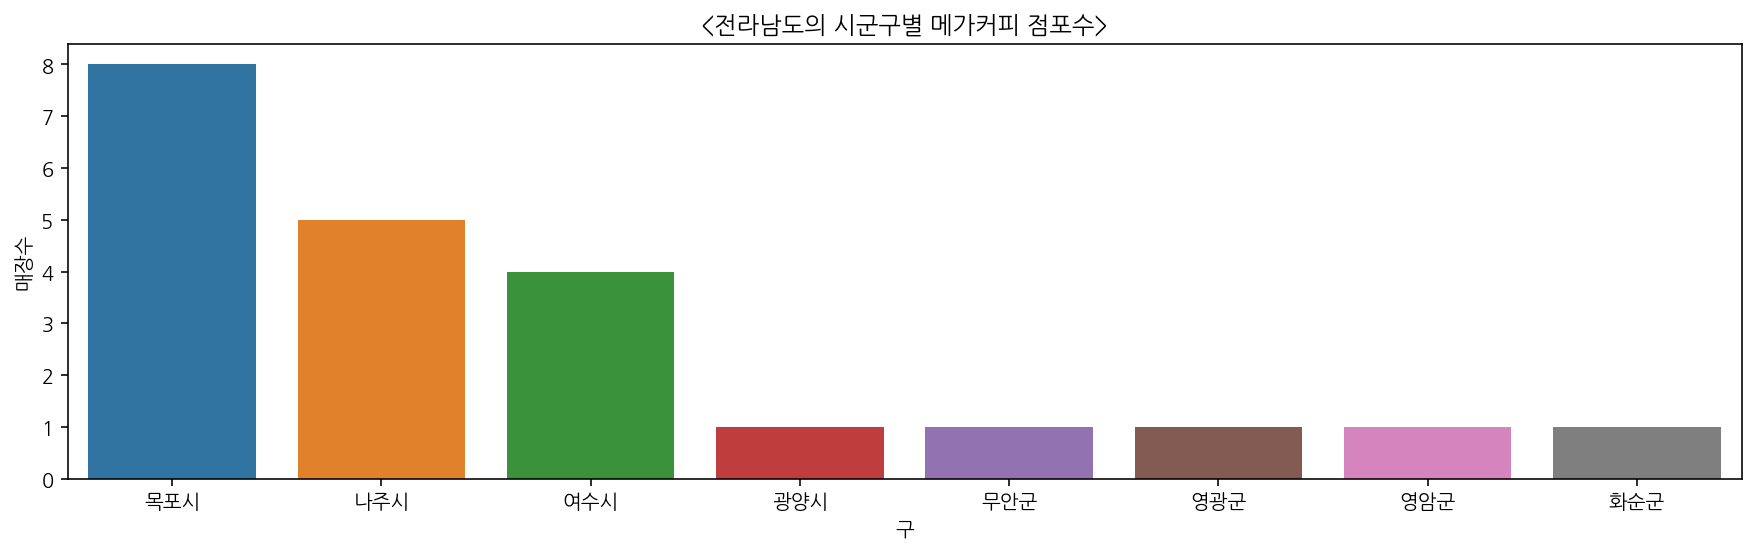

In [37]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs[df_cafe_vs['브랜드명']=='메가커피'].sort_values("매장수", ascending=False), x="구", y="매장수")#, hue="브랜드명")
plt.title('<{}의 시군구별 메가커피 점포수>'.format(city))

In [38]:
lat=df_cafe["위도"].mean()
long=df_cafe["경도"].mean()
lat, long

(34.8672354495006, 127.04884500033863)

In [39]:
m = folium.Map([lat, long], zoom_start=12, tiles="Stamen Toner")
for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    title = f"{df_cafe.loc[i, '브랜드명']} - {df_cafe.loc[i, '도로명주소']}"
    color = "green"
    if df_cafe.loc[i, "브랜드명"] == "메가커피":
        color = "orange"
    folium.CircleMarker([sub_lat, sub_long],
                        radius=3,
                        color=color,
                          tooltip=title).add_to(m)
m

In [40]:
geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding="utf-8"))

In [41]:
df_star = df_cafe_vs[df_cafe_vs["브랜드명"] == "스타벅스"]
df_mega = df_cafe_vs[df_cafe_vs["브랜드명"] == "메가커피"]

In [42]:
# df_star로 스타벅스 매장 수 구하기
m = folium.Map([lat, long],tiles='cartodbpositron')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_star,
    columns=['구', '매장수'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color='Greens',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 매장수'
).add_to(m)
m

In [43]:
# df_mega로 메가커피 매장 수 구하기
m = folium.Map([lat, long],tiles='cartodbpositron')
folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_mega,
    columns=['구', '매장수'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color='Oranges',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='메가커피 매장수'
).add_to(m)
m